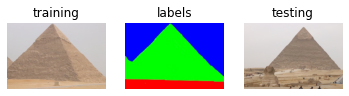

In [2]:
import cv2; #import OpenCV – computer vision functions
import numpy as np; #handle arrays/matrices
import matplotlib.pyplot as plt; #for plotting graphs and showing images
import math;
import random;

no_Gaussian=5;
stdev=10;#fixed standard deviation
no_iterations=0;
act_mean=np.zeros([no_Gaussian,3]);
orgimg=cv2.imread('pyramid2.jpeg')#training image
img=cv2.cvtColor(orgimg,cv2.COLOR_BGR2RGB);
orgimg_label=cv2.imread('pyramid2_label.jpeg')#training labels
img_label=cv2.cvtColor(orgimg_label,cv2.COLOR_BGR2RGB);
org_test_img=cv2.imread('pyramid1.jpeg')#test image
img_test=cv2.cvtColor(org_test_img,cv2.COLOR_BGR2RGB);
plt.subplot(131);plt.imshow(img);plt.title('training');plt.axis('off')
plt.subplot(132);plt.imshow(img_label);plt.title('labels');plt.axis('off');
plt.subplot(133);plt.imshow(img_test);plt.title('testing');plt.axis('off');
plt.show()



In [7]:
#load the training data
width=img.shape[1];height=img.shape[0];
No_training_samples=30;
training_data=np.zeros([No_training_samples,3]);
training_label=np.zeros(No_training_samples);
for i in range(No_training_samples):
    rx=int(random.random()*width);
    ry=int(random.random()*height);
    training_data[i]=img[ry,rx];
    training_label[i]=0;
    if (img_label[ry,rx,0]>200): training_label[i]=0;
    elif(img_label[ry,rx,1]>200):training_label[i]=1;
    else:training_label[i]=2;

In [8]:
def Gaussian(data,mean):#calculate the Guassian distance from the Guassian mean and stdev
    sum=0.0;
    pstd=pow(2*math.pi,len(data)/2)
    for i in range(len(mean)):
        sum+=(((data[i]-mean[i])**2)/(2*stdev*stdev));
        pstd+=stdev;
    if (pstd==0):return 1;
    else: return math.exp(-sum)/pstd;
def GetRandomNumber(range):#range is the max (i.e. range=10, then random number with range 0 to 10)
    return random.random()*range;
def init(no_Gaussian,act_mean):   
    for j in range(no_Gaussian):
        act_mean[j]=[GetRandomNumber(255),GetRandomNumber(255),GetRandomNumber(255)];
    return act_mean;
def iteration(training_data,no_Gaussian,curmean):
    estmean=np.zeros([no_Gaussian,3]);
    estsum=np.zeros([no_Gaussian,3]);
    Qij=np.zeros([No_training_samples,no_Gaussian]);
    for i in range (No_training_samples):
        qdata=training_data[i];
        for j in range(no_Gaussian):
            Qij[i][j]=Gaussian(qdata,curmean[j]);
    Eyij=np.zeros([No_training_samples,no_Gaussian]);    
    for i in range (No_training_samples):
        gsum=0;
        for j in range(no_Gaussian):
            gsum+=Qij[i][j];
        for j in range(no_Gaussian):
            Eyij[i][j]=Qij[i][j]/gsum;
    #Maximisation step
    for j in range(no_Gaussian):
        estmean[j]=0;
        estsum[j]=0;
        for i in range (No_training_samples):
            qdata=training_data[i];
            estmean[j]+=Eyij[i][j]*qdata;
            estsum[j]+=Eyij[i][j];
        estmean[j]/=estsum[j];
    return estmean;       
def Find_Label_for_each_Gaussian(training_data,training_label,no_classes,act_mean):
    votes=np.zeros([no_classes,no_Gaussian]);#no_classes=3
    for i in range (No_training_samples):
        maxvalue=-9999;
        theg=0;
        for j in range(no_Gaussian):            
            Qij= Gaussian(training_data[i], act_mean[j]);  
            if (Qij>maxvalue):
                maxvalue=Qij;
                theg=j;
        votes[int(training_label[i])][theg]+=1;
    result=np.zeros(no_Gaussian);
    for j in range(no_Gaussian):
        maxvote=0;
        pclass=0;
        for a in range(no_classes):
            if (votes[a][j]>maxvote):
                maxvote=votes[a][j];
                pclass=a;
        result[j]=pclass;
    return result;
def drawResultImage(img,act_mean,gaussian_labels):
    resultimg=img.copy();
    width=img.shape[1];
    height=img.shape[0];
    for y in range(height):
        for x in range(width):
            maxvalue=-99999; theg=0;
            qdata=img[y,x]; Qij=0;
            for j in range(no_Gaussian):
                Qij= Gaussian(qdata, act_mean[j]);  
                if (Qij>maxvalue):
                    maxvalue=Qij;
                    theg=j; 
            if (gaussian_labels[theg]==0):
                resultimg[y,x,0]=255;resultimg[y,x,1]=0;resultimg[y,x,2]=0;
            elif (gaussian_labels[theg]==1):
                resultimg[y,x,1]=255;resultimg[y,x,0]=0;resultimg[y,x,2]=0;
            else: resultimg[y,x,2]=255;resultimg[y,x,1]=0;resultimg[y,x,0]=0;
            #resultimg[y,x]=act_mean[theg];
    return resultimg;

In [9]:
act_mean=init(no_Gaussian,act_mean);
for it in range (5):
    act_mean=iteration(training_data,no_Gaussian,act_mean);    
g_labels=Find_Label_for_each_Gaussian(training_data,training_label,3,act_mean);
resultimg=drawResultImage(img_test,act_mean,g_labels);

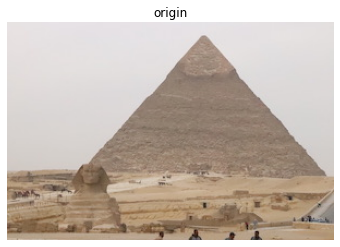

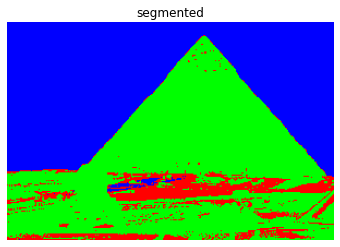

In [10]:
plt.imshow(img_test);plt.title('origin');plt.axis('off');plt.show();
plt.imshow(resultimg);plt.title('segmented');plt.axis('off');plt.show()  